In [1]:
import sqlite3
from IPython.display import HTML, display

db = 'file:results.db?mode=ro'
con = sqlite3.connect(db, uri=True)

cur = con.cursor()
cur.execute("SELECT * FROM runs WHERE description LIKE '%scaling%'")

def display_result(cur, data=cur.fetchall()):
    html = "<table>"
    headers = list(map(lambda x: x[0], cur.description))
    
    html += "<thead><tr>" + "".join(["<td>" + h + "</td>" for h in headers]) + "</tr></thead>"
    for row in data:
        html += "<tr>"
        for field in row:
            html += "<td>%s</td>"%(field)
        html += "</tr>"
    html += "</table>"
    display(HTML(html))
display_result(cur)

id,date,hostname,revision,cluster_size,description,flags
21,2021-12-14 14:38:53,i10pc138,caae9e9ec5aac44a8b29bab1d8911f246c244264,256,strong scaling,
22,2021-12-14 14:44:51,i10pc138,caae9e9ec5aac44a8b29bab1d8911f246c244264,256,weak scaling,
41,2022-01-10 08:44:23,i10pc138,1deabd72b7f7d5fe4eaeef7383eb91da073478d1,256,strong scaling,
42,2022-01-10 10:38:32,i10pc138,6af69514ce25e5f2079e5042fff353eeaca32f8c,256,strong scaling,
43,2022-01-10 10:43:43,i10pc138,eb91b74c7e54246a406e4d01483a14ecde10c84f,256,strong scaling,
48,2022-01-14 11:59:46,i10pc138,9578b5497f9997bdc3b1e381d9f51589e3ef828c,256,strong scaling,
49,2022-01-14 12:05:06,i10pc138,9578b5497f9997bdc3b1e381d9f51589e3ef828c,256,strong scaling,
53,2022-01-14 12:30:25,i10pc138,23e04dab81e4be269603ebe194219c7c483d99f4,256,strong scaling,
73,2022-02-02 10:13:58,i10pc138,812f1f2ffdd2655ddd09838ca1e5ca06c1a9424f,256,strong scaling,
74,2022-02-02 10:15:57,i10pc138,812f1f2ffdd2655ddd09838ca1e5ca06c1a9424f,256,strong scaling,


In [4]:
benchmark_id = 79

<IPython.core.display.Javascript object>


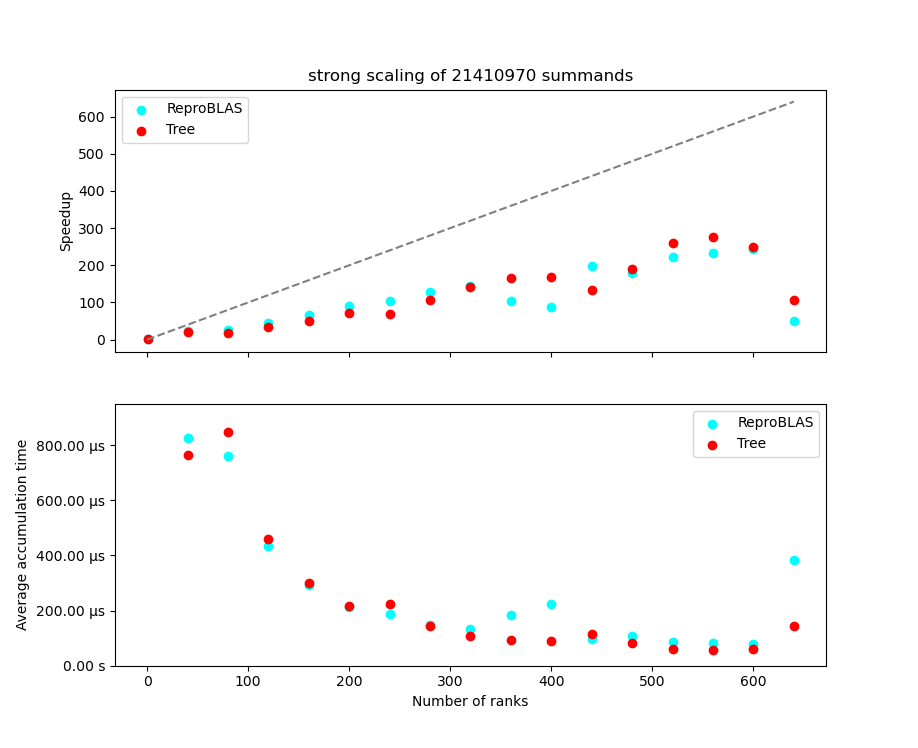

In [29]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import EngFormatter

cur.execute("SELECT description FROM runs WHERE id = ?", (benchmark_id,))
description = cur.fetchone()[0]
weak_scaling = (description == "weak scaling")

def fetch_data(benchmark_id, mode):
    

    cur.execute("SELECT time_ns, n_summands FROM results WHERE run_id=? AND ranks = 1 AND mode = ?", (benchmark_id,mode))
    r = cur.fetchone()
    sequential_time = r[0] * 1e-9

    cur.execute("""
    SELECT ranks, time_ns, messages_sent, avg_summands_per_message
    FROM results 
    LEFT JOIN messages ON id=messages.result_id
    WHERE run_id = ? AND ranks > 1 AND mode = ?
    ORDER BY ranks;
    """, (benchmark_id,mode))

    X = [1] # core count
    Y = [1] # speed-up
    T = [sequential_time] # absolute time
    MSG_SENT = [0] # messages sent
    AVG_SUMMANDS_PER_MESSAGE = [0]

    for row in cur.fetchall():
        ranks, time_ns, messages_sent, avg_summands_per_message = row
        X.append(ranks)
        parallel_time = time_ns * 1e-9
        T.append(parallel_time)
        speedup = sequential_time / parallel_time
        if weak_scaling:
            speedup *= ranks
        Y.append(speedup)
        MSG_SENT.append(messages_sent)
        AVG_SUMMANDS_PER_MESSAGE.append(avg_summands_per_message)
    return X, Y, r[1], T
    
RX, RY, N, reproblasT = fetch_data(benchmark_id, 'reproblas')
TX, TY, _, treeT = fetch_data(benchmark_id, 'tree')
    
f, axs = plt.subplots(2, sharex=True)

ax = axs[0]

ax.set_ylabel(("Scaled " if weak_scaling else "") + "Speedup")
ax.set_title(f"{description} of {N} summands")

ax.plot([0,max(RX)], [0,max(RX)], "--", color='gray')
ax.scatter(RX, RY, c='cyan', label='ReproBLAS')
ax.scatter(RX, TY, c='red', label='Tree')

ax.legend(loc='upper left')

ax = axs[1]
formatter0 = EngFormatter(unit='s', places=2)
ax.set_xlabel("Number of ranks")
ax.set_ylabel("Average accumulation time")
ax.scatter(RX, reproblasT, c='cyan', label='ReproBLAS')
ax.scatter(RX, treeT, c='red', label='Tree')
ax.yaxis.set_major_formatter(formatter0)
ax.set_ylim(top=950e-6,bottom=0)
ax.legend(loc='upper right')

plt.savefig("strong_scaling_256.svg")
plt.show()

<IPython.core.display.Javascript object>


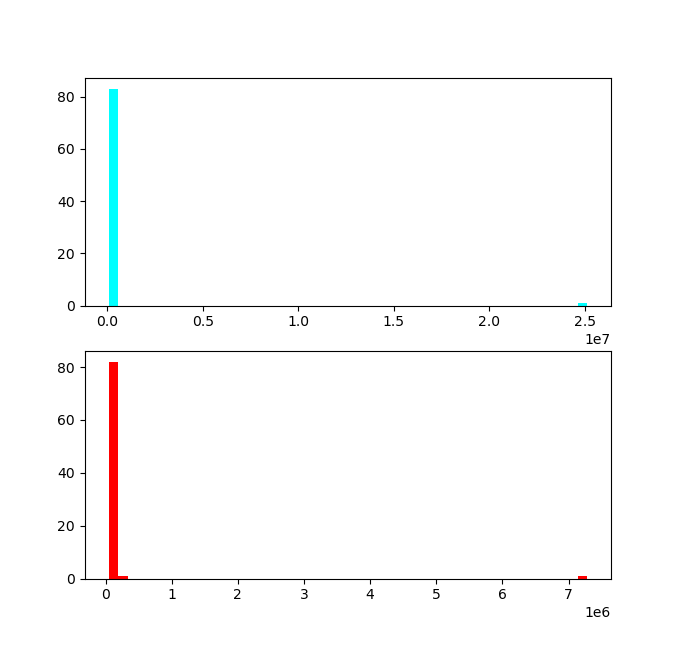

(array([82.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  49678.  ,  194316.18,  338954.36,  483592.54,  628230.72,
         772868.9 ,  917507.08, 1062145.26, 1206783.44, 1351421.62,
        1496059.8 , 1640697.98, 1785336.16, 1929974.34, 2074612.52,
        2219250.7 , 2363888.88, 2508527.06, 2653165.24, 2797803.42,
        2942441.6 , 3087079.78, 3231717.96, 3376356.14, 3520994.32,
        3665632.5 , 3810270.68, 3954908.86, 4099547.04, 4244185.22,
        4388823.4 , 4533461.58, 4678099.76, 4822737.94, 4967376.12,
        5112014.3 , 5256652.48, 5401290.66, 5545928.84, 5690567.02,
        5835205.2 , 5979843.38, 6124481.56, 6269119.74, 6413757.92,
        6558396.1 , 6703034.28, 6847672.46, 6992310.64, 7136948.82,
        7281587.  ]),
 <BarContainer

In [34]:
f, axs = plt.subplots(2)
axs[0].hist([414705.0, 75044.0, 77753.0, 74047.0, 73504.0, 80292.0, 72970.0, 82183.0, 78312.0, 72693.0, 71347.0, 71739.0, 72747.0, 25126772.0, 147318.0, 100212.0, 78732.0, 78096.0, 77952.0, 80202.0, 77955.0, 81333.0, 77788.0, 77279.0, 83480.0, 78054.0, 77124.0, 80456.0, 91817.0, 77686.0, 77873.0, 77861.0, 81985.0, 77704.0, 77754.0, 98616.0, 70726.0, 77766.0, 82811.0, 77355.0, 77753.0, 78591.0, 77131.0, 77345.0, 88663.0, 82625.0, 88070.0, 78837.0, 76451.0, 86131.0, 76297.0, 75332.0, 75820.0, 80538.0, 80189.0, 75561.0, 82871.0, 75888.0, 77851.0, 192863.0, 80300.0, 81374.0, 81051.0, 74446.0, 80537.0, 74655.0, 89018.0, 74607.0, 103879.0, 74595.0, 83841.0, 81573.0, 109171.0, 72879.0, 72067.0, 78108.0, 73869.0, 73561.0, 88377.0, 73505.0, 73323.0, 74884.0, 74407.0, 71761.0],
        bins=50, color='cyan')
axs[1].hist([51917.0, 51199.0, 51871.0, 51519.0, 63068.0, 51726.0, 7281587.0, 195612.0, 51123.0, 51590.0, 51378.0, 55440.0, 52149.0, 51677.0, 62888.0, 51087.0, 50840.0, 51034.0, 103913.0, 59968.0, 67310.0, 51463.0, 52423.0, 51129.0, 51694.0, 51881.0, 61717.0, 72923.0, 59868.0, 51124.0, 51279.0, 51279.0, 50713.0, 50910.0, 57971.0, 61016.0, 51166.0, 63281.0, 53107.0, 74913.0, 49875.0, 49854.0, 50200.0, 50127.0, 49678.0, 50570.0, 55918.0, 50200.0, 58875.0, 50260.0, 53123.0, 61286.0, 62920.0, 93534.0, 64537.0, 51686.0, 50562.0, 50741.0, 67224.0, 51021.0, 51027.0, 51280.0, 51462.0, 51070.0, 54884.0, 51216.0, 50949.0, 51168.0, 54340.0, 50522.0, 51282.0, 57654.0, 51036.0, 62719.0, 51659.0, 51101.0, 51556.0, 55409.0, 52173.0, 51138.0, 50810.0, 51440.0, 51273.0, 53655.0],
          bins=50,color='red')